# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score

# Importing The The Train And Test Dataset

In [2]:
dataset_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
dataset_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
dataset_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dataset_train.shape

(1460, 81)

In [5]:
dataset_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
dataset_test.shape

(1459, 80)

# Combining the Test and Train Dataset

**I am doing so because it will make some easy doing and we will have less data to be treated as both test and train are merged together**

In [7]:
dataset = pd.concat([dataset_train, dataset_test])

# Checking Null values in dataset
**First of all we will check is there any null or nan value in our dataset.For This I will use two methods.**

By using inbuilt method of our data ,i.e., isnull() method
By using heatmap function of seaborn library

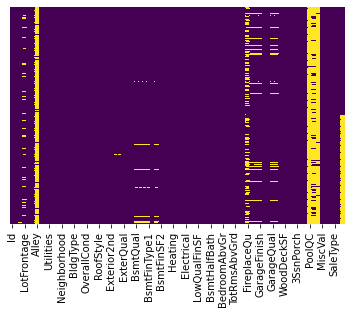

In [8]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [9]:
null_value_train = dict(dataset.isnull().sum())
for i,j in null_value_train.items():
    print(i,"==>",j)

Id ==> 0
MSSubClass ==> 0
MSZoning ==> 4
LotFrontage ==> 486
LotArea ==> 0
Street ==> 0
Alley ==> 2721
LotShape ==> 0
LandContour ==> 0
Utilities ==> 2
LotConfig ==> 0
LandSlope ==> 0
Neighborhood ==> 0
Condition1 ==> 0
Condition2 ==> 0
BldgType ==> 0
HouseStyle ==> 0
OverallQual ==> 0
OverallCond ==> 0
YearBuilt ==> 0
YearRemodAdd ==> 0
RoofStyle ==> 0
RoofMatl ==> 0
Exterior1st ==> 1
Exterior2nd ==> 1
MasVnrType ==> 24
MasVnrArea ==> 23
ExterQual ==> 0
ExterCond ==> 0
Foundation ==> 0
BsmtQual ==> 81
BsmtCond ==> 82
BsmtExposure ==> 82
BsmtFinType1 ==> 79
BsmtFinSF1 ==> 1
BsmtFinType2 ==> 80
BsmtFinSF2 ==> 1
BsmtUnfSF ==> 1
TotalBsmtSF ==> 1
Heating ==> 0
HeatingQC ==> 0
CentralAir ==> 0
Electrical ==> 1
1stFlrSF ==> 0
2ndFlrSF ==> 0
LowQualFinSF ==> 0
GrLivArea ==> 0
BsmtFullBath ==> 2
BsmtHalfBath ==> 2
FullBath ==> 0
HalfBath ==> 0
BedroomAbvGr ==> 0
KitchenAbvGr ==> 0
KitchenQual ==> 1
TotRmsAbvGrd ==> 0
Functional ==> 2
Fireplaces ==> 0
FireplaceQu ==> 1420
GarageType ==> 157
Ga

# Droping Columns Having High Amount of Nan Value For Dataset

**For Train Dataset As We can See PoolQC,Alley,Fence,MiscFeature Have High Amount of Nan Value so Drop Them.**
**Also I will Drop Id Column As it has no value in determining the Price of Houses.**

In [10]:
dataset.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id'], axis=1, inplace=True)

# Inserting new Values at the place of missing data in dataset

In [11]:
dataset['MSZoning'] = dataset['MSZoning'].fillna(dataset['MSZoning'].mode())
dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].mean())
dataset['Utilities'] = dataset['Utilities'].fillna(dataset['Utilities'].mode())
dataset['Exterior1st'] = dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode())
dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna(dataset['Exterior2nd'].mode())
dataset['MasVnrType'] = dataset['MasVnrType'].fillna(dataset['MasVnrType'].mode())
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].mean())
dataset['BsmtQual'] = dataset['BsmtQual'].fillna(dataset['BsmtQual'].mode())
dataset['BsmtCond'] = dataset['BsmtCond'].fillna(dataset['BsmtCond'].mode())
dataset['BsmtExposure'] = dataset['BsmtExposure'].fillna(dataset['BsmtExposure'].mode())
dataset['BsmtFinType1'] = dataset['BsmtFinType1'].fillna(dataset['BsmtFinType1'].mode())
dataset['BsmtFinSF1'] = dataset['BsmtFinSF1'].fillna(dataset['BsmtFinSF1'].mean())
dataset['BsmtFinType2'] = dataset['BsmtFinType2'].fillna(dataset['BsmtFinType2'].mode())
dataset['BsmtFinSF2'] = dataset['BsmtFinSF2'].fillna(dataset['BsmtFinSF2'].mean())
dataset['BsmtUnfSF'] = dataset['BsmtUnfSF'].fillna(dataset['BsmtUnfSF'].mean())
dataset['TotalBsmtSF'] = dataset['TotalBsmtSF'].fillna(dataset['TotalBsmtSF'].mean())
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode())
dataset['BsmtFullBath'] = dataset['BsmtFullBath'].fillna(dataset['BsmtFullBath'].median())
dataset['BsmtHalfBath'] = dataset['BsmtHalfBath'].fillna(dataset['BsmtHalfBath'].median())
dataset['KitchenQual'] = dataset['KitchenQual'].fillna(dataset['KitchenQual'].mode())
dataset['Functional'] = dataset['Functional'].fillna(dataset['Functional'].mode())        
dataset['GarageType'] = dataset['GarageType'].fillna(dataset['GarageType'].mode())
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(dataset['GarageYrBlt'].median())
dataset['GarageFinish'] = dataset['GarageFinish'].fillna(dataset['GarageFinish'].mode())
dataset['GarageCars'] = dataset['GarageCars'].fillna(dataset['GarageCars'].median())
dataset['GarageArea'] = dataset['GarageArea'].fillna(dataset['GarageArea'].mean())
dataset['GarageQual'] = dataset['GarageQual'].fillna(dataset['GarageQual'].mode())        
dataset['GarageCond'] = dataset['GarageCond'].fillna(dataset['GarageCond'].mode())
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna(dataset['FireplaceQu'].mode())
dataset['SaleType'] = dataset['SaleType'].fillna(dataset['SaleType'].mode())

# Encoding categorical Columns using Pandas Library

In [12]:
dataset = pd.get_dummies(dataset, drop_first=True)

# Making our dependent and independent features

**Now making our dependent and independent features to test our model and predict for future values.**

In [13]:
dataset_train_1 = dataset.iloc[:1460, :]
dataset_test_1 = dataset.iloc[1460:, :]

In [14]:
y_train = dataset_train_1['SalePrice'].values
dataset_train_1 = dataset_train_1.drop('SalePrice', axis=1)
dataset_test_1 = dataset_test_1.drop('SalePrice', axis=1)

In [15]:
X_train = dataset_train_1.iloc[:, :].values
X_test = dataset_test_1.iloc[:, :].values

# Traing the train dataset 

In [16]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

# Calculating the R^2 for our training set
**I am calculating the R^2 for my training dataset to see how well my model is adapted to the train dataset to predict housing price.**

In [17]:
y_pred_train = regressor.predict(X_train)
print(r2_score(y_train,y_pred_train))

0.9994367891487334


# Prediction for test Set

In [18]:
y_pred_test = regressor.predict(X_test)

In [19]:
output = pd.DataFrame({'Id': dataset_test.Id, 'SalePrice': y_pred_test})
output.to_csv('my_submission_house_prediction_3.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
